In [1]:
# STEP 1: Install required packages
!pip install shap gcsfs xgboost

# STEP 2: Authenticate with Google if needed
from google.colab import auth
auth.authenticate_user()

In [2]:
# STEP 3: Set paths to your files in Google Cloud Storage
model_path = 'gs://ai_ops_final_project25k/pipeline_root/256797333550/credit-card-fraud-ml-pipeline-20250406030500/train-xgboost-model_-4596477814110158848/model_output/model.pkl'
test_data_path = 'gs://ai_ops_final_project25k/pipeline_root/256797333550/credit-card-fraud-ml-pipeline-20250405184331/split-data_-1865480046714552320/test_data.csv'


In [8]:
# STEP 4: Load the test dataset
import pandas as pd

X_test = pd.read_csv(test_data_path)

# Drop label column if it's included
if 'Class' in X_test.columns:
    X_test = X_test.drop(columns=['Class'])
print(X_test)

             V1        V2        V3        V4        V5        V6        V7  \
0     -0.309736  0.957459 -0.672974 -0.821944  1.107254 -0.886354  1.641402   
1     -1.273661 -2.018603  1.229660 -0.662529  2.222357 -1.610603 -1.632372   
2     -1.607594  1.606631  0.587798  2.062531  0.906891  2.690496  1.248561   
3      0.913356 -0.057669 -0.658332  0.254943  0.023018 -0.686241  0.149122   
4      0.533027  0.940485 -0.794435  1.120291  0.549808 -1.576192  0.723813   
...         ...       ...       ...       ...       ...       ...       ...   
56957 -0.394079  0.114060  1.188494  0.397583  0.093197  1.705739 -0.261969   
56958  0.617031 -1.063728 -0.286290  0.572665 -0.851398  0.092153 -0.320893   
56959 -0.476667  0.441893  0.008141 -2.238440  0.105298 -0.145581  0.196683   
56960  0.957893 -0.819897 -0.541660 -0.694947 -0.454688  0.435765 -1.071607   
56961  0.541119 -0.476904  0.034876 -0.247789 -0.856585 -0.532188 -0.683296   

             V8        V9       V10  ...       V21 

In [4]:
# STEP 5: Load the trained model from GCS
import gcsfs
import pickle

fs = gcsfs.GCSFileSystem()

with fs.open(model_path, 'rb') as f:
    model = pickle.load(f)


In [5]:
# STEP 6: Run SHAP to explain the model
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)


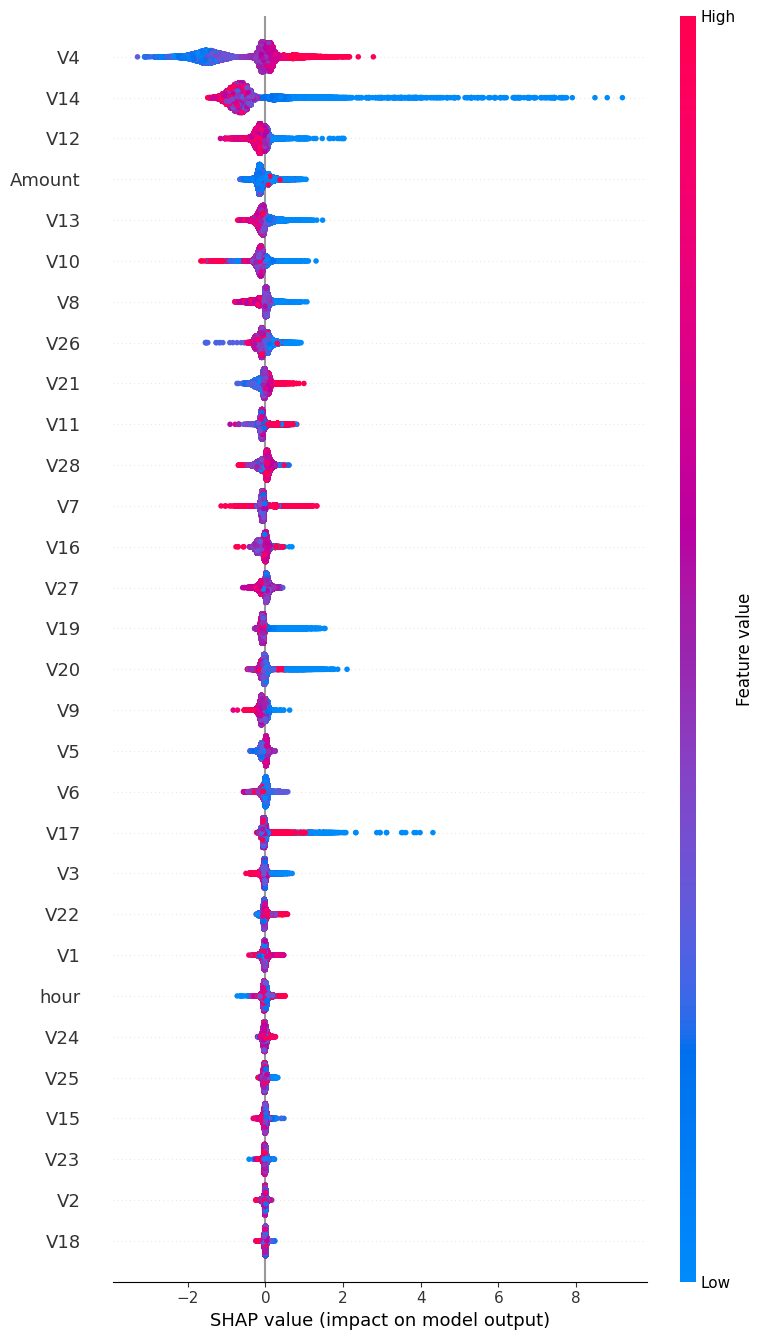

In [9]:
# STEP 7: Global explanation (most important features)
shap.summary_plot(shap_values, X_test, max_display=35)


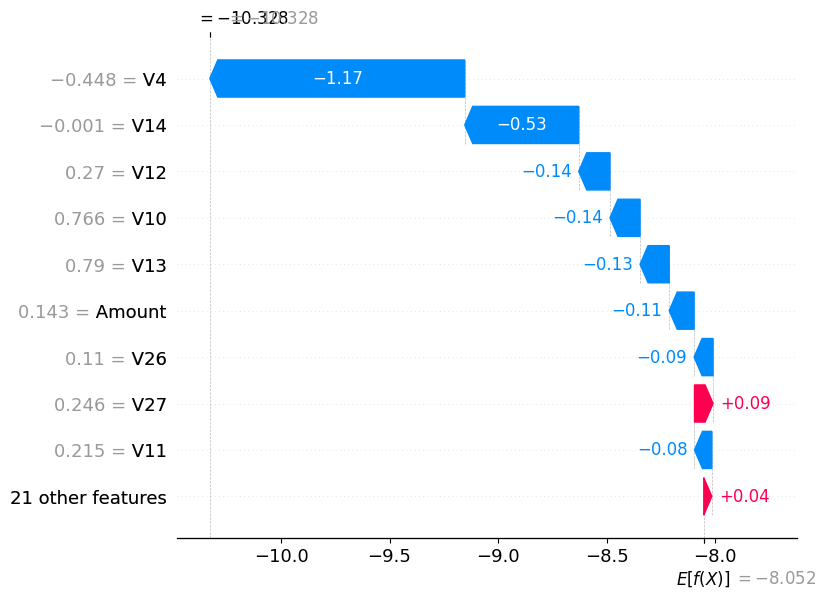

In [11]:
# STEP 8: Local explanation for one example (e.g., row 0)
shap.plots.waterfall(shap_values[100])  # use another row with a clearer split



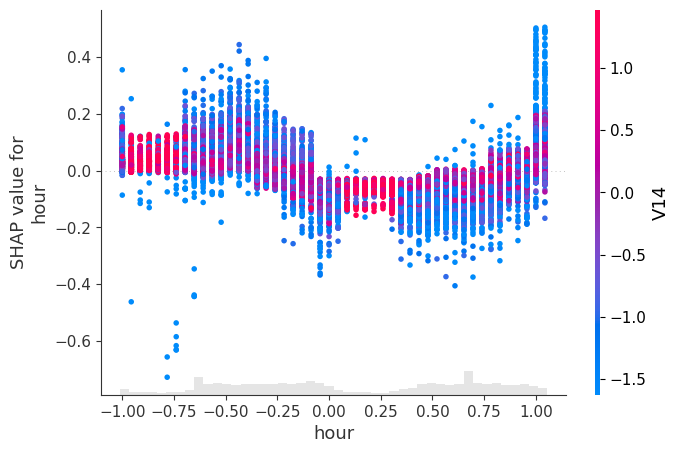

In [10]:
shap.plots.scatter(shap_values[:, "hour"], color=shap_values)